In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
sns.set()

insurance=pd.read_csv(r'C:\Users\Anthony\Desktop\archive (1)\insurance.csv')
insurance.region.unique()
print(insurance.isnull.sum())


AttributeError: 'function' object has no attribute 'sum'

Let's take a look at the top rows of the data to see what we are working with:

In [3]:
display(insurance.head())
print(insurance['bmi'].describe())
print(insurance['sex'].value_counts())
print(insurance['smoker'].value_counts())
print(insurance['children'].value_counts())
display(insurance.isnull().sum())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Let's first create some new categories that will help us later. So we can see that men and women were sampled roughly equally from this data set. We can first perform some EDA to get a feel for the data! 

,age,sex,bmi,children,smoker,region,charges,Children Categorical,Age Categorical,BMI Classes
0,19,female,27.900,0,yes,southwest,16884.92400,childless,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,1-3 children,18-30,Obesity Class I
2,28,male,33.000,3,no,southeast,4449.46200,1-3 children,18-30,Obesity Class I
3,33,male,22.705,0,no,northwest,21984.47061,childless,31-50,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,childless,31-50,Overweight


1338


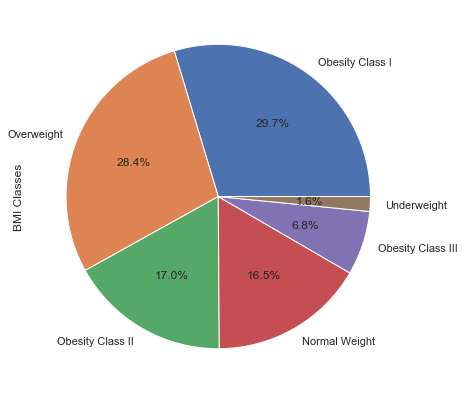

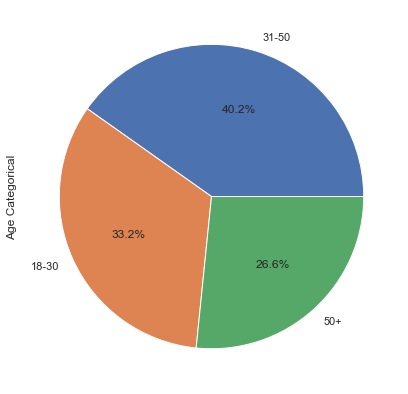

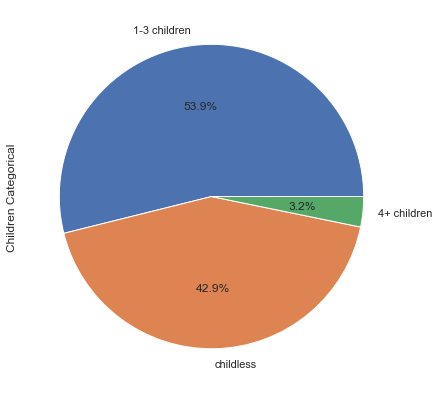

<Figure size 432x288 with 0 Axes>

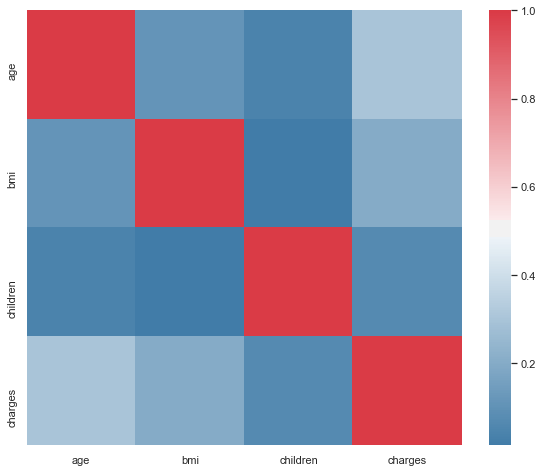

In [4]:
def children(data):
    if data==0:
        return 'childless'
    if data>=1 and data<=3:
        return '1-3 children'
    if data > 3:
        return '4+ children'
    
def age(age):
    if 18<= age <=30:
        return '18-30'
    if age>30 and age<=50:
        return '31-50'
    if age > 50:
        return '50+'
def get_bmi(b):
    if b <=18.5:
        return 'Underweight'
    if b>18.5 and b<=24.9:
        return 'Normal Weight'
    if 24.9< b <=29.9:
        return 'Overweight'
    if b>29.9 and b<=34.9:
        return 'Obesity Class I'
    if b>34.9 and b<=40:
        return 'Obesity Class II'
    if b>40:
        return 'Obesity Class III'
    
insurance['Children Categorical']=insurance['children'].apply(children)
insurance['Age Categorical']=insurance['age'].apply(age)
insurance['BMI Classes']=insurance['bmi'].apply(get_bmi)

display(insurance.head())


n_data=len(insurance)
print(n_data)
n_bins=np.sqrt(n_data)
n_bins=int(n_bins)
px.histogram(insurance, x='charges', color='sex')
plt.figure()
display(insurance['BMI Classes'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7)))
plt.figure()
display(insurance['Age Categorical'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7)))
plt.figure()
display(insurance['Children Categorical'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7)))
plt.figure()
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)


From the data, we can see most patients were charged $14000 or less out of this particular data set. We can also see that on average, women had less insurance charges overall than men. Let's compute an ECDF to get a better idea of the distribution of charges: 

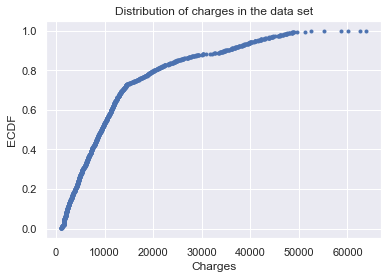

'"for i in insurance.region.value_counts():\n    ecdf(insurance.loc[i][\'charges\'])\n    \n    x_charge, y_charge = ecdf(insurance.loc[i][\'charges\'])\n\n    plt.plot(x_charge, y_charge, marker = \'.\', linestyle=\'none\')\n    plt.xlabel(\'i charges\')\n    plt.ylabel(\'ECDF\')\n    plt.show()'

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_charge, y_charge = ecdf(insurance['charges'])

plt.plot(x_charge, y_charge, marker = '.', linestyle='none')
plt.title("Distribution of charges in the data set")
plt.xlabel('Charges')
plt.ylabel('ECDF')
plt.show()

""""for i in insurance.region.value_counts():
    ecdf(insurance.loc[i]['charges'])
    
    x_charge, y_charge = ecdf(insurance.loc[i]['charges'])

    plt.plot(x_charge, y_charge, marker = '.', linestyle='none')
    plt.xlabel('i charges')
    plt.ylabel('ECDF')
    plt.show()"""


From this ECDF we can see that roughly 50% of people were charged $10,000 or less. The next question we can ask was if there was any difference in charges, on average, between regions? 

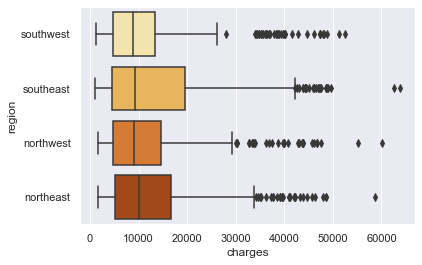

In [7]:
sns.boxplot(y='region', x='charges', data=insurance, orient='h', palette='YlOrBr')

It looks like in the southeast region, mopre people were charged more than $16000 when compared to the other regions. Did smoking affect the amount patients were charged?

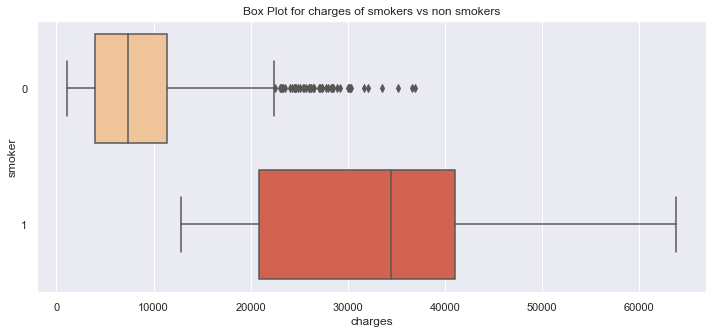

In [11]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for charges of smokers vs non smokers")
sns.boxplot(y='smoker', x='charges', data=insurance,orient='h', palette='OrRd')

It's clear that smokers did end up paying more for health care than non smokers. I am 26 years old, so something I'd be interested in knowing is how many people who were around my age were smoking in this study. 

C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 432x288 with 0 Axes>

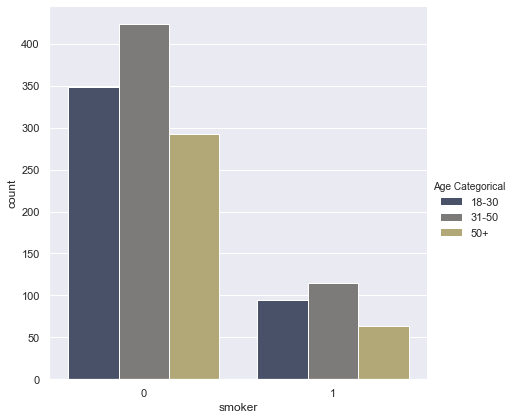

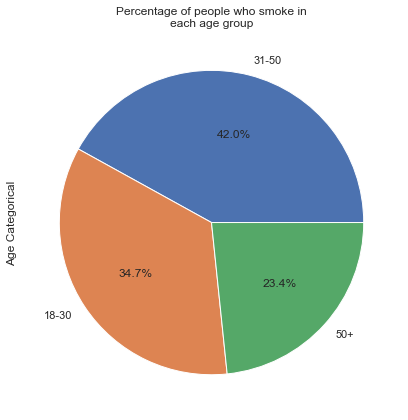

<Figure size 432x288 with 0 Axes>

In [12]:
sns.catplot(x='smoker', kind='count', palette='cividis', hue='Age Categorical', data=insurance, size=6)
plt.figure()
smokers=insurance[insurance.smoker == 1]
display(smokers['Age Categorical'].value_counts().plot.pie(title="""Percentage of people who smoke in
each age group""", autopct="%1.1f%%",figsize=(10,7)))
plt.figure()

 Most people who smoked, from this data, appeared to have been aged between 31-50, and close behind were people who were younger (18-30), with the least amount of people who smoked to have been aged 50+. Another question we can ask is: Did having any children have any affect on the final charges?

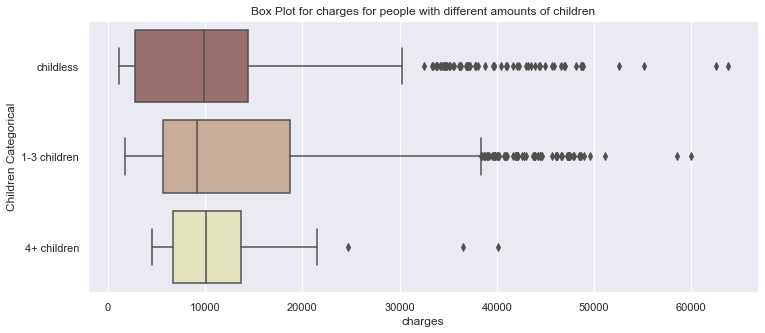

In [13]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for charges for people with different amounts of children")
sns.boxplot(y='Children Categorical', x='charges', data=insurance,orient='h', palette='pink')

It's clear that people who had no children were charged, on average, slightly less than people with no children, although the median amount of charges were roughly the same across the categories presented above. What about diet?

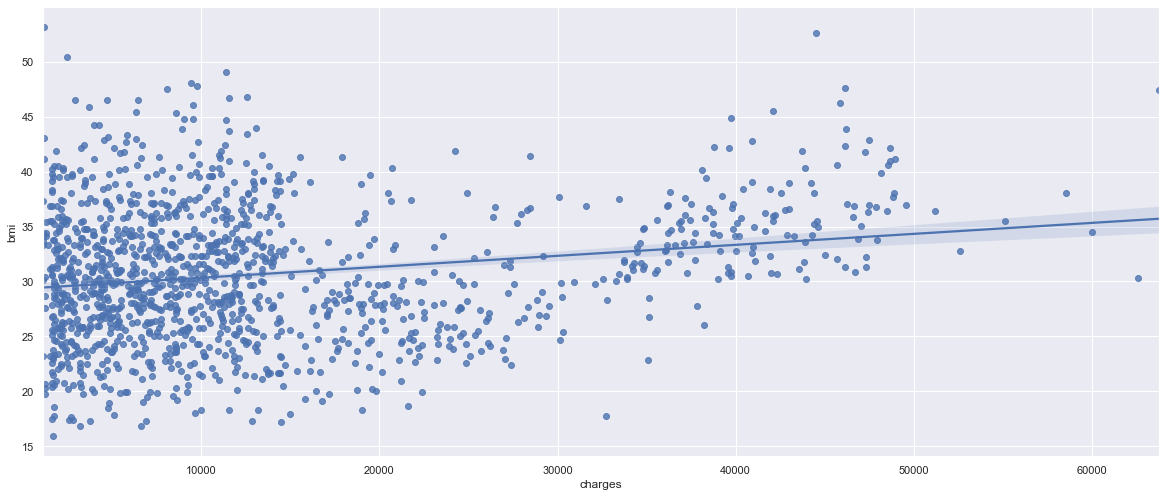

In [14]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='charges', y='bmi', data=insurance)

From the above we can see that there seems to be a slight correlation between patient charges and their BMI. We can also take a look at different regions:

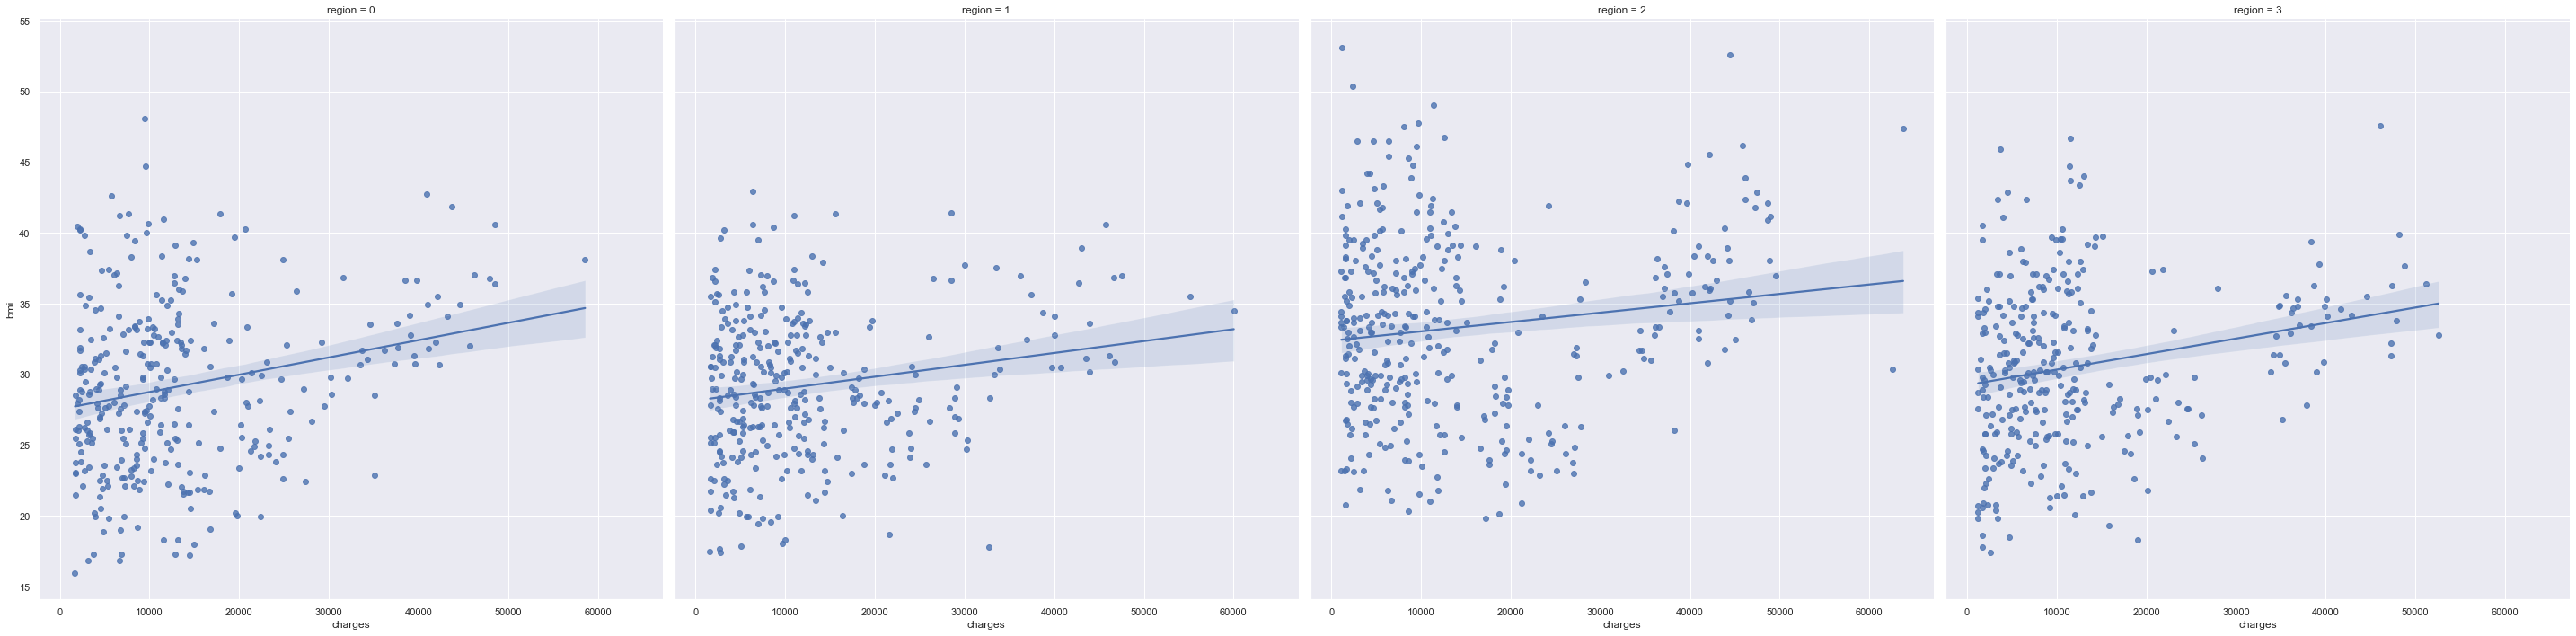

In [15]:


sns.lmplot(x='charges', y='bmi', data=insurance, col='region', height=10)

From the above figure it looks like those in the southeast region have slightly elevated bmi on average, and also more people that were charged over $40000 than the other regions. Now that we've explored our data, we can use multiple linear regression to see if we can estimate charges based on the features that are present in the data set. 

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
results=smf.ols('charges ~ age+bmi+C(sex)+C(region)+C(smoker)', data=insurance).fit()
print(results.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.regressionplots.plot_regress_exog(results, "age", fig=fig)

If you were a smoker, OLS predicts you would be paying an additional $23000 in charges! Yikes! An R^2 value of roughly 75 percent tells us that 75 percent of the variability in charges is explained by the the age, the BMI, and whether the patient was a smoker or not. According to the OLS, sex and region did not contribute to the variability in charges. 

Next we can try multiple linear regression to see if we can improve the model:

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#first we have to convert some of our categorical variables into something readable for sklearn

le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)
# smoker or not
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)
#region
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)

#Now we can move onto train/test split and regression

X=insurance.drop(['charges', 'BMI Classes', 'Children Categorical', 'Age Categorical'], axis=1)
y=insurance.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred=reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))



R^2: 0.7694415927057695
Root Mean Squared Error: 5814.246890069995


So we computed an accuracy of roughly 77% with our multiple linear regression model, and an RMSE of 5814. In general, we want our RMSE to be lower, as an RMSE of 0 indicates a perfect fit to the data. Before trying out other models to see if we can improve our model, let's use the benefits of cross validation to use all our data to obtain more metrics, and also check to see if our model performs consistently across different train/test splits, so that in case we ever productionalize the model, it will lead to similar performance. 

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(reg_all, X, y, cv=5)

print(cv_scores)
print("Average 5-fold CV score: {}".format(np.mean(cv_scores)))

Given that the models performed in a similar way across all 5 folds, it's safe to say that the distribution of the data was roughly the same across the 5 fold cross validation. Linear regression is a good model if the relationship between our features and the charges of patients is linear. Another model I am curious to try is the KNN regressor model, which we can apply to this problem to see the output:

In [ ]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    print("R^2: {}".format(model.score(X_test, y_test)))
min(rmse_val)

It looks like K-nearest neighbors regression did not do that well, with the lowest RMSE being 11069, and the best R^2 value being ~0.164. Linear regression did a much better job at prediction. 
